In [1]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import albumentations as albu
import segmentation_models as sm
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
from model import ModelCreator
from datapipeline import DatasetCreator
import shutil

Segmentation Models: using `tf.keras` framework.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
BACKBONE = 'resnet50'

In [4]:
heigh = 512

In [5]:
#model = sm.Unet(BACKBONE, encoder_weights='imagenet')
modelcreator = ModelCreator()
model = modelcreator.buildmodel()
model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])

KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None), name='conv2d_transpose_6/Sigmoid:0', description="created by layer 'conv2d_transpose_6'")


In [6]:
#dataset = DatasetCreator(sm.get_preprocessing(BACKBONE))
valdataset = DatasetCreator(modelcreator.getpreprocess())

In [7]:
valdata = valdataset('crosval/val/*png','castom-masks/masks_machine/',albu.Compose([albu.Resize(heigh,heigh,always_apply=True)]))
len(valdata)

8

In [8]:
testaugmentation = albu.Compose([
    albu.Resize(heigh,heigh,always_apply=True),
    albu.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
    albu.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
    albu.HorizontalFlip(p=0.5),
    albu.RandomRotate90(),
    albu.GaussianBlur(),
    albu.GaussNoise(),
    albu.Transpose(),
    ])

In [9]:
traindataset = DatasetCreator(modelcreator.getpreprocess())

In [10]:
traindata = traindataset('crosval/train/*png','castom-masks/masks_machine/',testaugmentation)
len(traindata)

18

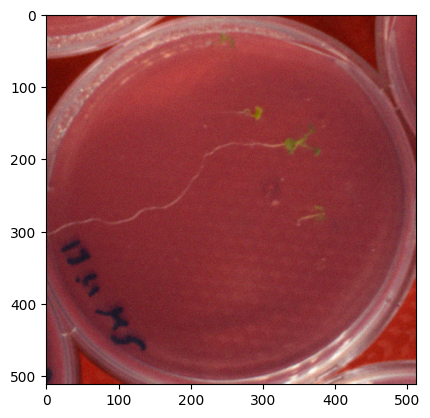

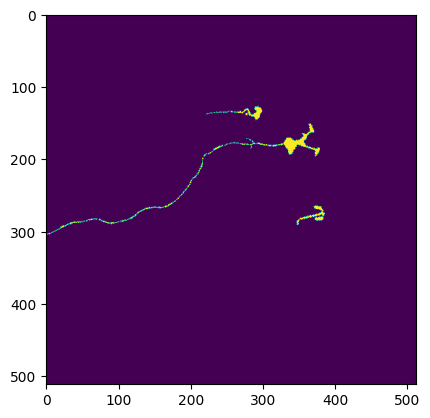

In [11]:
for image,mask in traindata.take(1):
        plt.imshow(tf.keras.utils.array_to_img(image[0]))
        plt.pause(1)
        plt.imshow(tf.keras.utils.array_to_img(mask[0]))

In [12]:
#tf.keras.utils.plot_model(model)

In [13]:
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1) if epoch > 10 and epoch % 10 == 0 else lr

callback =[
    tf.keras.callbacks.EarlyStopping(min_delta=0.0001,patience=20,verbose=1),
    tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath='libbestmodel/',save_best_only=True,monitor='val_loss',verbose=1)
]

In [14]:
# fit model
model_history = model.fit(
    traindata,
    epochs=1000,
    validation_data=valdata,
    callbacks=callback,
    )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/1000
18/18 [==============================] - ETA: 0s - loss: 2.1589 - iou_score: 0.0113
Epoch 1: val_loss improved from inf to 6.69280, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 2.1589 - iou_score: 0.0113 - val_loss: 6.6928 - val_iou_score: 0.0087 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/1000
18/18 [==============================] - ETA: 0s - loss: 1.3470 - iou_score: 0.0142
Epoch 2: val_loss improved from 6.69280 to 2.78526, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 1.3470 - iou_score: 0.0142 - val_loss: 2.7853 - val_iou_score: 0.0086 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/1000
18/18 [==============================] - ETA: 0s - loss: 1.1506 - iou_score: 0.0223
Epoch 3: val_loss improved from 2.78526 to 1.52245, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 1.1506 - iou_score: 0.0223 - val_loss: 1.5225 - val_iou_score: 0.0072 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/1000
18/18 [==============================] - ETA: 0s - loss: 1.0755 - iou_score: 0.0328
Epoch 4: val_loss improved from 1.52245 to 1.15781, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 1.0755 - iou_score: 0.0328 - val_loss: 1.1578 - val_iou_score: 0.0084 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/1000
18/18 [==============================] - ETA: 0s - loss: 1.0225 - iou_score: 0.0588
Epoch 5: val_loss improved from 1.15781 to 1.07983, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 1.0225 - iou_score: 0.0588 - val_loss: 1.0798 - val_iou_score: 0.0123 - lr: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 6/1000
18/18 [==============================] - ETA: 0s - loss: 0.9945 - iou_score: 0.0736
Epoch 6: val_loss improved from 1.07983 to 1.04955, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 38s 2s/step - loss: 0.9945 - iou_score: 0.0736 - val_loss: 1.0496 - val_iou_score: 0.0144 - lr: 0.0010

Epoch 7: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 7/1000
18/18 [==============================] - ETA: 0s - loss: 0.9681 - iou_score: 0.0920
Epoch 7: val_loss did not improve from 1.04955
18/18 [==============================] - 34s 2s/step - loss: 0.9681 - iou_score: 0.0920 - val_loss: 1.1123 - val_iou_score: 0.0124 - lr: 0.0010

Epoch 8: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 8/1000
18/18 [==============================] - ETA: 0s - loss: 0.9255 - iou_score: 0.1251
Epoch 8: val_loss did not improve from 1.04955
18/18 [==============================] - 32s 1s/step - loss: 0.9255 - iou_score: 0.1251 - val_loss: 1.0518 - val_iou_score: 0.0126 - lr: 0.0010

Epoch 9: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 9/1000
18/18 [====================

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 0.8922 - iou_score: 0.1589 - val_loss: 1.0299 - val_iou_score: 0.0239 - lr: 0.0010

Epoch 10: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 10/1000
18/18 [==============================] - ETA: 0s - loss: 0.8709 - iou_score: 0.1771
Epoch 10: val_loss improved from 1.02994 to 1.00150, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 0.8709 - iou_score: 0.1771 - val_loss: 1.0015 - val_iou_score: 0.0404 - lr: 0.0010

Epoch 11: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 11/1000
18/18 [==============================] - ETA: 0s - loss: 0.8752 - iou_score: 0.1722
Epoch 11: val_loss improved from 1.00150 to 0.98579, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 0.8752 - iou_score: 0.1722 - val_loss: 0.9858 - val_iou_score: 0.0568 - lr: 0.0010

Epoch 12: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 12/1000
18/18 [==============================] - ETA: 0s - loss: 0.8052 - iou_score: 0.2312
Epoch 12: val_loss improved from 0.98579 to 0.97188, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 0.8052 - iou_score: 0.2312 - val_loss: 0.9719 - val_iou_score: 0.0685 - lr: 0.0010

Epoch 13: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 13/1000
18/18 [==============================] - ETA: 0s - loss: 0.7602 - iou_score: 0.2757
Epoch 13: val_loss improved from 0.97188 to 0.89644, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 38s 2s/step - loss: 0.7602 - iou_score: 0.2757 - val_loss: 0.8964 - val_iou_score: 0.1427 - lr: 0.0010

Epoch 14: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 14/1000
18/18 [==============================] - ETA: 0s - loss: 0.7565 - iou_score: 0.2855
Epoch 14: val_loss did not improve from 0.89644
18/18 [==============================] - 34s 2s/step - loss: 0.7565 - iou_score: 0.2855 - val_loss: 0.9155 - val_iou_score: 0.1211 - lr: 0.0010

Epoch 15: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 15/1000
18/18 [==============================] - ETA: 0s - loss: 0.7458 - iou_score: 0.2921
Epoch 15: val_loss improved from 0.89644 to 0.83148, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 37s 2s/step - loss: 0.7458 - iou_score: 0.2921 - val_loss: 0.8315 - val_iou_score: 0.2036 - lr: 0.0010

Epoch 16: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 16/1000
18/18 [==============================] - ETA: 0s - loss: 0.7016 - iou_score: 0.3317
Epoch 16: val_loss did not improve from 0.83148
18/18 [==============================] - 34s 2s/step - loss: 0.7016 - iou_score: 0.3317 - val_loss: 0.8433 - val_iou_score: 0.1963 - lr: 0.0010

Epoch 17: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 17/1000
18/18 [==============================] - ETA: 0s - loss: 0.6896 - iou_score: 0.3497
Epoch 17: val_loss improved from 0.83148 to 0.77259, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 37s 2s/step - loss: 0.6896 - iou_score: 0.3497 - val_loss: 0.7726 - val_iou_score: 0.2626 - lr: 0.0010

Epoch 18: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 18/1000
18/18 [==============================] - ETA: 0s - loss: 0.6599 - iou_score: 0.3692
Epoch 18: val_loss improved from 0.77259 to 0.74847, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 38s 2s/step - loss: 0.6599 - iou_score: 0.3692 - val_loss: 0.7485 - val_iou_score: 0.2779 - lr: 0.0010

Epoch 19: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 19/1000
18/18 [==============================] - ETA: 0s - loss: 0.6427 - iou_score: 0.3947
Epoch 19: val_loss improved from 0.74847 to 0.66456, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 36s 2s/step - loss: 0.6427 - iou_score: 0.3947 - val_loss: 0.6646 - val_iou_score: 0.3594 - lr: 0.0010

Epoch 20: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 20/1000
18/18 [==============================] - ETA: 0s - loss: 0.6434 - iou_score: 0.3899
Epoch 20: val_loss did not improve from 0.66456
18/18 [==============================] - 33s 2s/step - loss: 0.6434 - iou_score: 0.3899 - val_loss: 0.6655 - val_iou_score: 0.3544 - lr: 0.0010

Epoch 21: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 21/1000
18/18 [==============================] - ETA: 0s - loss: 0.6142 - iou_score: 0.4203
Epoch 21: val_loss improved from 0.66456 to 0.66284, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 36s 2s/step - loss: 0.6142 - iou_score: 0.4203 - val_loss: 0.6628 - val_iou_score: 0.3698 - lr: 9.0484e-04

Epoch 22: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 22/1000
18/18 [==============================] - ETA: 0s - loss: 0.6095 - iou_score: 0.4152
Epoch 22: val_loss improved from 0.66284 to 0.60875, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 34s 2s/step - loss: 0.6095 - iou_score: 0.4152 - val_loss: 0.6088 - val_iou_score: 0.4212 - lr: 9.0484e-04

Epoch 23: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 23/1000
18/18 [==============================] - ETA: 0s - loss: 0.6073 - iou_score: 0.4255
Epoch 23: val_loss improved from 0.60875 to 0.60812, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.6073 - iou_score: 0.4255 - val_loss: 0.6081 - val_iou_score: 0.4166 - lr: 9.0484e-04

Epoch 24: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 24/1000
18/18 [==============================] - ETA: 0s - loss: 0.5870 - iou_score: 0.4446
Epoch 24: val_loss improved from 0.60812 to 0.56359, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5870 - iou_score: 0.4446 - val_loss: 0.5636 - val_iou_score: 0.4533 - lr: 9.0484e-04

Epoch 25: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 25/1000
18/18 [==============================] - ETA: 0s - loss: 0.5971 - iou_score: 0.4378
Epoch 25: val_loss improved from 0.56359 to 0.51435, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5971 - iou_score: 0.4378 - val_loss: 0.5144 - val_iou_score: 0.5032 - lr: 9.0484e-04

Epoch 26: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 26/1000
18/18 [==============================] - ETA: 0s - loss: 0.5714 - iou_score: 0.4587
Epoch 26: val_loss improved from 0.51435 to 0.51342, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5714 - iou_score: 0.4587 - val_loss: 0.5134 - val_iou_score: 0.5070 - lr: 9.0484e-04

Epoch 27: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 27/1000
18/18 [==============================] - ETA: 0s - loss: 0.6031 - iou_score: 0.4339
Epoch 27: val_loss did not improve from 0.51342
18/18 [==============================] - 30s 1s/step - loss: 0.6031 - iou_score: 0.4339 - val_loss: 0.5146 - val_iou_score: 0.5111 - lr: 9.0484e-04

Epoch 28: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 28/1000
18/18 [==============================] - ETA: 0s - loss: 0.5793 - iou_score: 0.4540
Epoch 28: val_loss did not improve from 0.51342
18/18 [==============================] - 33s 2s/step - loss: 0.5793 - iou_score: 0.4540 - val_loss: 0.5185 - val_iou_score: 0.5081 - lr: 9.0484e-04

Epoch 29: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 29/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 0.5570 - iou_score: 0.4747 - val_loss: 0.4870 - val_iou_score: 0.5301 - lr: 9.0484e-04

Epoch 30: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 30/1000
18/18 [==============================] - ETA: 0s - loss: 0.5670 - iou_score: 0.4641
Epoch 30: val_loss improved from 0.48698 to 0.48274, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5670 - iou_score: 0.4641 - val_loss: 0.4827 - val_iou_score: 0.5418 - lr: 9.0484e-04

Epoch 31: LearningRateScheduler setting learning rate to 0.0008187307976186275.
Epoch 31/1000
18/18 [==============================] - ETA: 0s - loss: 0.5566 - iou_score: 0.4757
Epoch 31: val_loss improved from 0.48274 to 0.45218, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5566 - iou_score: 0.4757 - val_loss: 0.4522 - val_iou_score: 0.5760 - lr: 8.1873e-04

Epoch 32: LearningRateScheduler setting learning rate to 0.0008187307976186275.
Epoch 32/1000
18/18 [==============================] - ETA: 0s - loss: 0.5744 - iou_score: 0.4612
Epoch 32: val_loss did not improve from 0.45218
18/18 [==============================] - 30s 1s/step - loss: 0.5744 - iou_score: 0.4612 - val_loss: 0.4757 - val_iou_score: 0.5399 - lr: 8.1873e-04

Epoch 33: LearningRateScheduler setting learning rate to 0.0008187307976186275.
Epoch 33/1000
18/18 [==============================] - ETA: 0s - loss: 0.5791 - iou_score: 0.4531
Epoch 33: val_loss did not improve from 0.45218
18/18 [==============================] - 29s 1s/step - loss: 0.5791 - iou_score: 0.4531 - val_loss: 0.4754 - val_iou_score: 0.5533 - lr: 8.1873e-04

Epoch 34: LearningRateScheduler setting learning rate to 0.0008187307976186275.
Epoch 34/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5488 - iou_score: 0.4830 - val_loss: 0.4370 - val_iou_score: 0.5874 - lr: 8.1873e-04

Epoch 35: LearningRateScheduler setting learning rate to 0.0008187307976186275.
Epoch 35/1000
18/18 [==============================] - ETA: 0s - loss: 0.5541 - iou_score: 0.4800
Epoch 35: val_loss did not improve from 0.43705
18/18 [==============================] - 29s 1s/step - loss: 0.5541 - iou_score: 0.4800 - val_loss: 0.4840 - val_iou_score: 0.5456 - lr: 8.1873e-04

Epoch 36: LearningRateScheduler setting learning rate to 0.0008187307976186275.
Epoch 36/1000
18/18 [==============================] - ETA: 0s - loss: 0.5580 - iou_score: 0.4780
Epoch 36: val_loss did not improve from 0.43705
18/18 [==============================] - 30s 1s/step - loss: 0.5580 - iou_score: 0.4780 - val_loss: 0.4525 - val_iou_score: 0.5759 - lr: 8.1873e-04

Epoch 37: LearningRateScheduler setting learning rate to 0.0008187307976186275.
Epoch 37/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5460 - iou_score: 0.4831 - val_loss: 0.4338 - val_iou_score: 0.5913 - lr: 7.4082e-04

Epoch 42: LearningRateScheduler setting learning rate to 0.0007408182718791068.
Epoch 42/1000
18/18 [==============================] - ETA: 0s - loss: 0.5333 - iou_score: 0.4985
Epoch 42: val_loss improved from 0.43382 to 0.42379, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5333 - iou_score: 0.4985 - val_loss: 0.4238 - val_iou_score: 0.6046 - lr: 7.4082e-04

Epoch 43: LearningRateScheduler setting learning rate to 0.0007408182718791068.
Epoch 43/1000
18/18 [==============================] - ETA: 0s - loss: 0.5078 - iou_score: 0.5220
Epoch 43: val_loss improved from 0.42379 to 0.41576, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5078 - iou_score: 0.5220 - val_loss: 0.4158 - val_iou_score: 0.6055 - lr: 7.4082e-04

Epoch 44: LearningRateScheduler setting learning rate to 0.0007408182718791068.
Epoch 44/1000
18/18 [==============================] - ETA: 0s - loss: 0.5308 - iou_score: 0.5027
Epoch 44: val_loss did not improve from 0.41576
18/18 [==============================] - 29s 1s/step - loss: 0.5308 - iou_score: 0.5027 - val_loss: 0.4603 - val_iou_score: 0.5618 - lr: 7.4082e-04

Epoch 45: LearningRateScheduler setting learning rate to 0.0007408182718791068.
Epoch 45/1000
18/18 [==============================] - ETA: 0s - loss: 0.5274 - iou_score: 0.5016
Epoch 45: val_loss improved from 0.41576 to 0.40437, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5274 - iou_score: 0.5016 - val_loss: 0.4044 - val_iou_score: 0.6161 - lr: 7.4082e-04

Epoch 46: LearningRateScheduler setting learning rate to 0.0007408182718791068.
Epoch 46/1000
18/18 [==============================] - ETA: 0s - loss: 0.5235 - iou_score: 0.5038
Epoch 46: val_loss did not improve from 0.40437
18/18 [==============================] - 29s 1s/step - loss: 0.5235 - iou_score: 0.5038 - val_loss: 0.4103 - val_iou_score: 0.6145 - lr: 7.4082e-04

Epoch 47: LearningRateScheduler setting learning rate to 0.0007408182718791068.
Epoch 47/1000
18/18 [==============================] - ETA: 0s - loss: 0.5124 - iou_score: 0.5175
Epoch 47: val_loss did not improve from 0.40437
18/18 [==============================] - 29s 1s/step - loss: 0.5124 - iou_score: 0.5175 - val_loss: 0.4266 - val_iou_score: 0.5989 - lr: 7.4082e-04

Epoch 48: LearningRateScheduler setting learning rate to 0.0007408182718791068.
Epoch 48/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.5132 - iou_score: 0.5191 - val_loss: 0.4016 - val_iou_score: 0.6205 - lr: 6.7032e-04

Epoch 55: LearningRateScheduler setting learning rate to 0.0006703201215714216.
Epoch 55/1000
18/18 [==============================] - ETA: 0s - loss: 0.4889 - iou_score: 0.5425
Epoch 55: val_loss improved from 0.40163 to 0.38729, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 35s 2s/step - loss: 0.4889 - iou_score: 0.5425 - val_loss: 0.3873 - val_iou_score: 0.6330 - lr: 6.7032e-04

Epoch 56: LearningRateScheduler setting learning rate to 0.0006703201215714216.
Epoch 56/1000
18/18 [==============================] - ETA: 0s - loss: 0.5096 - iou_score: 0.5167
Epoch 56: val_loss did not improve from 0.38729
18/18 [==============================] - 34s 2s/step - loss: 0.5096 - iou_score: 0.5167 - val_loss: 0.4041 - val_iou_score: 0.6219 - lr: 6.7032e-04

Epoch 57: LearningRateScheduler setting learning rate to 0.0006703201215714216.
Epoch 57/1000
18/18 [==============================] - ETA: 0s - loss: 0.5043 - iou_score: 0.5249
Epoch 57: val_loss did not improve from 0.38729
18/18 [==============================] - 31s 1s/step - loss: 0.5043 - iou_score: 0.5249 - val_loss: 0.4315 - val_iou_score: 0.5983 - lr: 6.7032e-04

Epoch 58: LearningRateScheduler setting learning rate to 0.0006703201215714216.
Epoch 58/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.4938 - iou_score: 0.5358 - val_loss: 0.3869 - val_iou_score: 0.6335 - lr: 5.4881e-04

Epoch 74: LearningRateScheduler setting learning rate to 0.0005488117458298802.
Epoch 74/1000
18/18 [==============================] - ETA: 0s - loss: 0.4962 - iou_score: 0.5352
Epoch 74: val_loss did not improve from 0.38694
18/18 [==============================] - 31s 1s/step - loss: 0.4962 - iou_score: 0.5352 - val_loss: 0.4121 - val_iou_score: 0.6153 - lr: 5.4881e-04

Epoch 75: LearningRateScheduler setting learning rate to 0.0005488117458298802.
Epoch 75/1000
18/18 [==============================] - ETA: 0s - loss: 0.5010 - iou_score: 0.5309
Epoch 75: val_loss did not improve from 0.38694
18/18 [==============================] - 29s 1s/step - loss: 0.5010 - iou_score: 0.5309 - val_loss: 0.4003 - val_iou_score: 0.6256 - lr: 5.4881e-04

Epoch 76: LearningRateScheduler setting learning rate to 0.0005488117458298802.
Epoch 76/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 34s 2s/step - loss: 0.5043 - iou_score: 0.5321 - val_loss: 0.3794 - val_iou_score: 0.6456 - lr: 5.4881e-04

Epoch 80: LearningRateScheduler setting learning rate to 0.0005488117458298802.
Epoch 80/1000
18/18 [==============================] - ETA: 0s - loss: 0.5115 - iou_score: 0.5197
Epoch 80: val_loss did not improve from 0.37938
18/18 [==============================] - 29s 1s/step - loss: 0.5115 - iou_score: 0.5197 - val_loss: 0.4122 - val_iou_score: 0.6173 - lr: 5.4881e-04

Epoch 81: LearningRateScheduler setting learning rate to 0.0004965853877365589.
Epoch 81/1000
18/18 [==============================] - ETA: 0s - loss: 0.4969 - iou_score: 0.5368
Epoch 81: val_loss did not improve from 0.37938
18/18 [==============================] - 29s 1s/step - loss: 0.4969 - iou_score: 0.5368 - val_loss: 0.3824 - val_iou_score: 0.6439 - lr: 4.9659e-04

Epoch 82: LearningRateScheduler setting learning rate to 0.0004965853877365589.
Epoch 82/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 32s 2s/step - loss: 0.4957 - iou_score: 0.5358 - val_loss: 0.3762 - val_iou_score: 0.6501 - lr: 4.9659e-04

Epoch 83: LearningRateScheduler setting learning rate to 0.0004965853877365589.
Epoch 83/1000
18/18 [==============================] - ETA: 0s - loss: 0.5113 - iou_score: 0.5241
Epoch 83: val_loss did not improve from 0.37619
18/18 [==============================] - 29s 1s/step - loss: 0.5113 - iou_score: 0.5241 - val_loss: 0.3889 - val_iou_score: 0.6309 - lr: 4.9659e-04

Epoch 84: LearningRateScheduler setting learning rate to 0.0004965853877365589.
Epoch 84/1000
18/18 [==============================] - ETA: 0s - loss: 0.4947 - iou_score: 0.5358
Epoch 84: val_loss did not improve from 0.37619
18/18 [==============================] - 29s 1s/step - loss: 0.4947 - iou_score: 0.5358 - val_loss: 0.3900 - val_iou_score: 0.6322 - lr: 4.9659e-04

Epoch 85: LearningRateScheduler setting learning rate to 0.0004965853877365589.
Epoch 85/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.4887 - iou_score: 0.5430 - val_loss: 0.3721 - val_iou_score: 0.6463 - lr: 4.9659e-04

Epoch 87: LearningRateScheduler setting learning rate to 0.0004965853877365589.
Epoch 87/1000
18/18 [==============================] - ETA: 0s - loss: 0.4838 - iou_score: 0.5442
Epoch 87: val_loss did not improve from 0.37215
18/18 [==============================] - 29s 1s/step - loss: 0.4838 - iou_score: 0.5442 - val_loss: 0.3819 - val_iou_score: 0.6411 - lr: 4.9659e-04

Epoch 88: LearningRateScheduler setting learning rate to 0.0004965853877365589.
Epoch 88/1000
18/18 [==============================] - ETA: 0s - loss: 0.4856 - iou_score: 0.5453
Epoch 88: val_loss did not improve from 0.37215
18/18 [==============================] - 29s 1s/step - loss: 0.4856 - iou_score: 0.5453 - val_loss: 0.3797 - val_iou_score: 0.6429 - lr: 4.9659e-04

Epoch 89: LearningRateScheduler setting learning rate to 0.0004965853877365589.
Epoch 89/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 32s 2s/step - loss: 0.4767 - iou_score: 0.5533 - val_loss: 0.3707 - val_iou_score: 0.6438 - lr: 4.4933e-04

Epoch 93: LearningRateScheduler setting learning rate to 0.0004493290325626731.
Epoch 93/1000
18/18 [==============================] - ETA: 0s - loss: 0.5083 - iou_score: 0.5264
Epoch 93: val_loss did not improve from 0.37073
18/18 [==============================] - 29s 1s/step - loss: 0.5083 - iou_score: 0.5264 - val_loss: 0.3864 - val_iou_score: 0.6403 - lr: 4.4933e-04

Epoch 94: LearningRateScheduler setting learning rate to 0.0004493290325626731.
Epoch 94/1000
18/18 [==============================] - ETA: 0s - loss: 0.4957 - iou_score: 0.5369
Epoch 94: val_loss did not improve from 0.37073
18/18 [==============================] - 29s 1s/step - loss: 0.4957 - iou_score: 0.5369 - val_loss: 0.3969 - val_iou_score: 0.6252 - lr: 4.4933e-04

Epoch 95: LearningRateScheduler setting learning rate to 0.0004493290325626731.
Epoch 95/1000
18/18 [

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.4853 - iou_score: 0.5484 - val_loss: 0.3661 - val_iou_score: 0.6515 - lr: 4.4933e-04

Epoch 98: LearningRateScheduler setting learning rate to 0.0004493290325626731.
Epoch 98/1000
18/18 [==============================] - ETA: 0s - loss: 0.5043 - iou_score: 0.5293
Epoch 98: val_loss did not improve from 0.36613
18/18 [==============================] - 29s 1s/step - loss: 0.5043 - iou_score: 0.5293 - val_loss: 0.3858 - val_iou_score: 0.6364 - lr: 4.4933e-04

Epoch 99: LearningRateScheduler setting learning rate to 0.0004493290325626731.
Epoch 99/1000
18/18 [==============================] - ETA: 0s - loss: 0.4684 - iou_score: 0.5629
Epoch 99: val_loss did not improve from 0.36613
18/18 [==============================] - 29s 1s/step - loss: 0.4684 - iou_score: 0.5629 - val_loss: 0.3753 - val_iou_score: 0.6505 - lr: 4.4933e-04

Epoch 100: LearningRateScheduler setting learning rate to 0.0004493290325626731.
Epoch 100/1000
18/18

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.4632 - iou_score: 0.5623 - val_loss: 0.3647 - val_iou_score: 0.6613 - lr: 4.0657e-04

Epoch 106: LearningRateScheduler setting learning rate to 0.0004065697139594704.
Epoch 106/1000
18/18 [==============================] - ETA: 0s - loss: 0.4897 - iou_score: 0.5426
Epoch 106: val_loss did not improve from 0.36466
18/18 [==============================] - 29s 1s/step - loss: 0.4897 - iou_score: 0.5426 - val_loss: 0.3793 - val_iou_score: 0.6423 - lr: 4.0657e-04

Epoch 107: LearningRateScheduler setting learning rate to 0.0004065697139594704.
Epoch 107/1000
18/18 [==============================] - ETA: 0s - loss: 0.4867 - iou_score: 0.5458
Epoch 107: val_loss did not improve from 0.36466
18/18 [==============================] - 29s 1s/step - loss: 0.4867 - iou_score: 0.5458 - val_loss: 0.3775 - val_iou_score: 0.6444 - lr: 4.0657e-04

Epoch 108: LearningRateScheduler setting learning rate to 0.0004065697139594704.
Epoch 108/1000

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 34s 2s/step - loss: 0.4771 - iou_score: 0.5501 - val_loss: 0.3604 - val_iou_score: 0.6627 - lr: 4.0657e-04

Epoch 111: LearningRateScheduler setting learning rate to 0.000367879489203915.
Epoch 111/1000
18/18 [==============================] - ETA: 0s - loss: 0.4565 - iou_score: 0.5675
Epoch 111: val_loss did not improve from 0.36037
18/18 [==============================] - 30s 1s/step - loss: 0.4565 - iou_score: 0.5675 - val_loss: 0.3627 - val_iou_score: 0.6565 - lr: 3.6788e-04

Epoch 112: LearningRateScheduler setting learning rate to 0.000367879489203915.
Epoch 112/1000
18/18 [==============================] - ETA: 0s - loss: 0.4816 - iou_score: 0.5461
Epoch 112: val_loss did not improve from 0.36037
18/18 [==============================] - 29s 1s/step - loss: 0.4816 - iou_score: 0.5461 - val_loss: 0.3748 - val_iou_score: 0.6470 - lr: 3.6788e-04

Epoch 113: LearningRateScheduler setting learning rate to 0.000367879489203915.
Epoch 113/1000
18

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.4825 - iou_score: 0.5482 - val_loss: 0.3591 - val_iou_score: 0.6586 - lr: 3.3287e-04

Epoch 127: LearningRateScheduler setting learning rate to 0.0003328711318317801.
Epoch 127/1000
18/18 [==============================] - ETA: 0s - loss: 0.4538 - iou_score: 0.5765
Epoch 127: val_loss did not improve from 0.35915
18/18 [==============================] - 29s 1s/step - loss: 0.4538 - iou_score: 0.5765 - val_loss: 0.3625 - val_iou_score: 0.6596 - lr: 3.3287e-04

Epoch 128: LearningRateScheduler setting learning rate to 0.0003328711318317801.
Epoch 128/1000
18/18 [==============================] - ETA: 0s - loss: 0.4806 - iou_score: 0.5476
Epoch 128: val_loss did not improve from 0.35915
18/18 [==============================] - 29s 1s/step - loss: 0.4806 - iou_score: 0.5476 - val_loss: 0.3750 - val_iou_score: 0.6512 - lr: 3.3287e-04

Epoch 129: LearningRateScheduler setting learning rate to 0.0003328711318317801.
Epoch 129/1000

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.4717 - iou_score: 0.5556 - val_loss: 0.3585 - val_iou_score: 0.6571 - lr: 3.0119e-04

Epoch 134: LearningRateScheduler setting learning rate to 0.000301194260828197.
Epoch 134/1000
18/18 [==============================] - ETA: 0s - loss: 0.4887 - iou_score: 0.5432
Epoch 134: val_loss did not improve from 0.35850
18/18 [==============================] - 29s 1s/step - loss: 0.4887 - iou_score: 0.5432 - val_loss: 0.3753 - val_iou_score: 0.6438 - lr: 3.0119e-04

Epoch 135: LearningRateScheduler setting learning rate to 0.000301194260828197.
Epoch 135/1000
18/18 [==============================] - ETA: 0s - loss: 0.4749 - iou_score: 0.5521
Epoch 135: val_loss improved from 0.35850 to 0.35655, saving model to libbestmodel/
INFO:tensorflow:Assets written to: libbestmodel/assets


INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 34s 2s/step - loss: 0.4749 - iou_score: 0.5521 - val_loss: 0.3566 - val_iou_score: 0.6610 - lr: 3.0119e-04

Epoch 136: LearningRateScheduler setting learning rate to 0.000301194260828197.
Epoch 136/1000
18/18 [==============================] - ETA: 0s - loss: 0.4822 - iou_score: 0.5480
Epoch 136: val_loss did not improve from 0.35655
18/18 [==============================] - 32s 2s/step - loss: 0.4822 - iou_score: 0.5480 - val_loss: 0.3666 - val_iou_score: 0.6536 - lr: 3.0119e-04

Epoch 137: LearningRateScheduler setting learning rate to 0.000301194260828197.
Epoch 137/1000
18/18 [==============================] - ETA: 0s - loss: 0.4894 - iou_score: 0.5443
Epoch 137: val_loss did not improve from 0.35655
18/18 [==============================] - 32s 2s/step - loss: 0.4894 - iou_score: 0.5443 - val_loss: 0.3854 - val_iou_score: 0.6343 - lr: 3.0119e-04

Epoch 138: LearningRateScheduler setting learning rate to 0.000301194260828197.
Epoch 138/1000
18

INFO:tensorflow:Assets written to: libbestmodel/assets


18/18 [==============================] - 33s 2s/step - loss: 0.4689 - iou_score: 0.5572 - val_loss: 0.3522 - val_iou_score: 0.6660 - lr: 2.4660e-04

Epoch 156: LearningRateScheduler setting learning rate to 0.0002465970173943788.
Epoch 156/1000
18/18 [==============================] - ETA: 0s - loss: 0.4708 - iou_score: 0.5581
Epoch 156: val_loss did not improve from 0.35223
18/18 [==============================] - 31s 1s/step - loss: 0.4708 - iou_score: 0.5581 - val_loss: 0.3694 - val_iou_score: 0.6539 - lr: 2.4660e-04

Epoch 157: LearningRateScheduler setting learning rate to 0.0002465970173943788.
Epoch 157/1000
18/18 [==============================] - ETA: 0s - loss: 0.4751 - iou_score: 0.5562
Epoch 157: val_loss did not improve from 0.35223
18/18 [==============================] - 29s 1s/step - loss: 0.4751 - iou_score: 0.5562 - val_loss: 0.3781 - val_iou_score: 0.6473 - lr: 2.4660e-04

Epoch 158: LearningRateScheduler setting learning rate to 0.0002465970173943788.
Epoch 158/1000

In [15]:
testdata = valdataset('crosval/test/*png','castom-masks/masks_machine/',albu.Compose([albu.Resize(heigh,heigh,always_apply=True)]))

In [16]:
results = model.evaluate(testdata)
results

3/3 [==============================] - 2s 257ms/step - loss: 0.3936 - iou_score: 0.6514


[0.3935815095901489, 0.6514148712158203]

In [17]:
i = 0

if os.path.isdir('output/'):
    shutil.rmtree('output/')
os.makedirs('output/')

for img in testdata.take(len(testdata)):
    for image in img[0]:
        mask = model.predict((tf.reshape(image,[1,heigh,heigh,3])))
        mask = tf.keras.utils.array_to_img(mask[0])
        img = tf.keras.utils.array_to_img(image)
        img = cv2.cvtColor(np.array(img),cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(np.array(mask),cv2.COLOR_GRAY2RGB)
        vis = np.concatenate((img, mask), axis=1)
        i+=1
        cv2.imwrite('output/'+str(i)+'.png', vis)

1/1 [==============================] - 0s 124ms/step
